In [2]:
#Import first packages
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/student-mental-health/Student Mental health.csv',sep=',')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
#Check the variables
columns = list(df.columns)
for col in columns:
    print(col)
    print(df[col].value_counts())
    print('\n')

Timestamp
8/7/2020 12:39         3
8/7/2020 16:34         2
8/7/2020 14:43         2
8/7/2020 13:13         2
8/7/2020 14:57         2
                      ..
8/7/2020 14:47         1
8/7/2020 14:45         1
8/7/2020 14:41         1
8/7/2020 14:31         1
18/07/2020 20:16:21    1
Name: Timestamp, Length: 92, dtype: int64


Choose your gender
Female    75
Male      26
Name: Choose your gender, dtype: int64


Age
18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
Name: Age, dtype: int64


What is your course?
BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [6]:
df.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

The dataset has 101 observations and 11 variables, which the variable "Age" is a float and the others are strings. Additionally, we observed that the variable "Age" has 1 missing value.

# Variables:
- Timestamp: string type
- Choose your age: categorical type "Female" or "Male";
- What is your course?: 49 different courses;
- Age: float type with minimum 18 and maximum 24;
- Your current year of Study: categorical type "year 1", "Year 3", "Year 2", "year 2", "year 4", "year 3" and "Year 1". Here we noticed that for 1, 2 and 3 we have two ways of writing;               
- What is your CGPA?: categorical type from "0-1.99" to "3.50-4.00". Here we noticed that "3.50 - 4.00" is written in 2 ways;                   
- Marital status: categorical type "Yes" or "No";                                 
- Do you have Depression?: categorical type "Yes" or "No";                    
- Do you have Anxiety?: categorical type "Yes" or "No";                          
- Do you have Panic attack?: categorical type "Yes" or "No";                     
- Did you seek any specialist for a treatment?: categorical type "Yes" or "No";

In [7]:
# Histogram plots for "Age", "What is your CGPA?", "Your current year of Study" and "What is your course?"
import matplotlib
import matplotlib.pyplot as plt

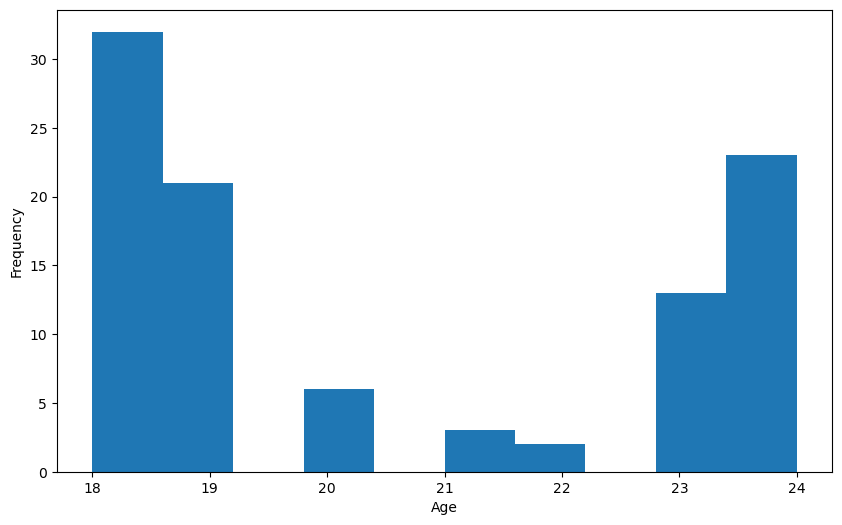

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df["Age"])
plt.xlabel("Age")
plt.ylabel("Frequency");

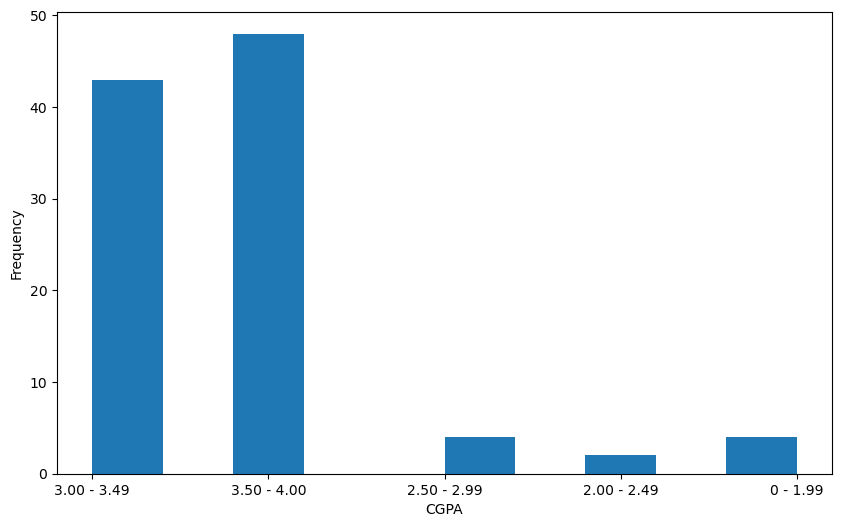

In [9]:
# Let's adjust the variable "What is your CGPA?" to plot the histogram
def CGPA_hist(x):
    if x == '3.50 - 4.00' or x == '3.50 - 4.00 ':
        return '3.50 - 4.00'
    elif x == '0 - 1.99':
        return '0 - 1.99'
    elif x == '2.00 - 2.49':
        return '2.00 - 2.49'
    elif x == '2.50 - 2.99':
        return '2.50 - 2.99'
    else:
        return '3.00 - 3.49'
df['What is your CGPA?_new'] = df['What is your CGPA?'].apply(lambda x: CGPA_hist(x))
plt.figure(figsize=(10,6))
plt.hist(df['What is your CGPA?_new'],bins=10)
plt.xlabel("CGPA")
plt.ylabel("Frequency");

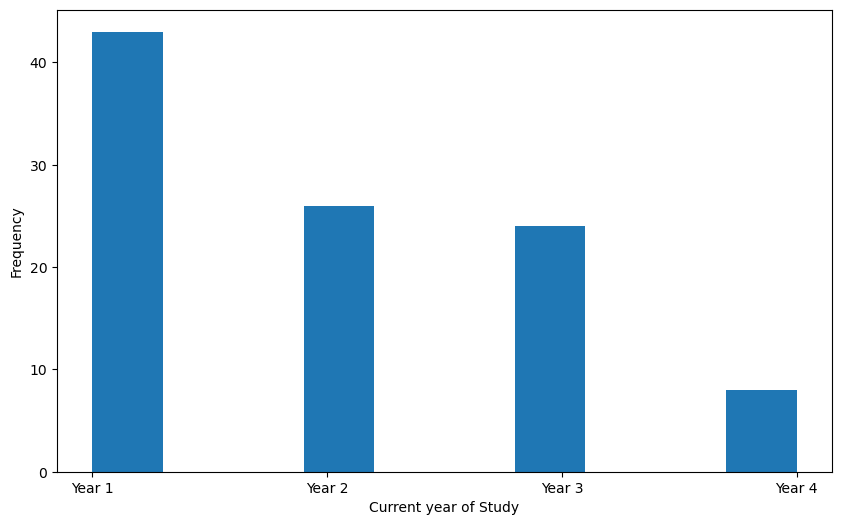

In [10]:
# Let's adjust the variable "Your current year of Study" to plot the histogram
def year_study_hist(x):
    if x == 'year 1' or x == 'Year 1':
        return 'Year 1'
    elif x == 'year 2' or x == 'Year 2':
        return 'Year 2'
    elif x == 'year 3' or x == 'Year 3':
        return 'Year 3'
    else:
        return 'Year 4'
df['Your current year of Study_new'] = df['Your current year of Study'].apply(lambda x: year_study_hist(x))
plt.figure(figsize=(10,6))
plt.hist(df['Your current year of Study_new'], bins=10)
plt.xlabel("Current year of Study")
plt.ylabel("Frequency");

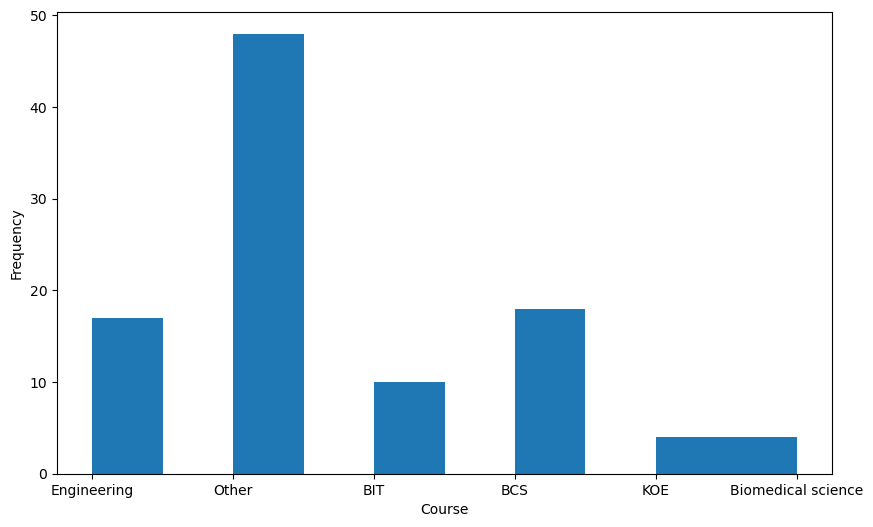

In [11]:
# Let's adjust the variable "What is your course?" to plot the histogram
def course_hist(x):
    if x not in ('BCS','Engineering','BIT','Biomedical science','KOE'):#,'BENL','psychology','Laws','Engine'):
        return 'Other'
    else:
        return x
df['What is your course_new'] = df['What is your course?'].apply(lambda x: course_hist(x))
plt.figure(figsize=(10,6))
plt.hist(df['What is your course_new'], bins=10)
plt.xlabel("Course")
plt.ylabel("Frequency");

## Multiple Correspondence Analysis

Multiple Correspondence Analysis (MCA) is an unsupervised Machine Learning method used to verify if there is a relationship between more than 2 categorical variables.

Our goal is to analyze associations between depression (variable "Do you have Depression?") and other variables present in the dataset.

First, we will use the chi-squared test (also known as chi-square or χ2 test) for each pair of categorical variables to verify if the variables show an association with at least one of the other variables. Note that if a variable is not categorical, it is necessary to transform quantitative data (such as the variable "Age") into categories.

We have 9 categorical variables and one numeric variable. We are not including the variable "Timestamp" in our analysis because it doesn't make sense. Therefore, if we adjust the variable "Age", which is numeric, into 3 categories (18-20, 21-22, and 23-24), and consider 6 categories for the variable "What is your course?" (BCS, Engineering, BIT, Biomedical Science, KOE, and Other), we will have a total of 30 categories involved in our analysis.

In [12]:
# Relationship
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from scipy import stats

In [13]:
df = df.dropna()

In [14]:
df.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
What is your CGPA?_new                          0
Your current year of Study_new                  0
What is your course_new                         0
dtype: int64

In [15]:
def age_new(x):
    if x <= 20:
        return '18 t0 20'
    elif x <= 22:
        return '21 t0 22'
    else:
        return '23 t0 24'
df['Age_new'] = df['Age'].apply(lambda x: age_new(x))

In [16]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?',
       'What is your CGPA?_new', 'Your current year of Study_new',
       'What is your course_new', 'Age_new'],
      dtype='object')

In [17]:
df_ACM = df[['Choose your gender', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?',
       'What is your CGPA?_new', 'Your current year of Study_new',
       'What is your course_new','Age_new']]
keep_var=[]
for i in range(0, len(df_ACM.columns)):
    for j in range(0,len(df_ACM.columns)):
        if df_ACM.columns[i] != df_ACM.columns[j]:
            tbl_cont = pd.crosstab(df_ACM[df_ACM.columns[i]], df_ACM[df_ACM.columns[j]])
            chi2, pvalor, gl, ve = stats.chi2_contingency(tbl_cont)
            if pvalor < 0.05:
                print(df_ACM.columns[i])
                print(df_ACM.columns[j])
                print(pvalor)
                print('\n')
                keep_var.append(df_ACM.columns[i])
                keep_var.append(df_ACM.columns[j])
            else: 
                pass
print('\n')
print('Keep variables:')
print(list(set(keep_var)))

Marital status
Do you have Depression?
1.499033927764545e-08


Marital status
Do you have Panic attack?
0.014363585332132299


Marital status
Did you seek any specialist for a treatment?
0.003529738188919104


Marital status
Your current year of Study_new
0.01033763464392542


Do you have Depression?
Marital status
1.499033927764545e-08


Do you have Depression?
Do you have Anxiety?
0.013194249179498846


Do you have Depression?
Do you have Panic attack?
0.027307742420946357


Do you have Depression?
Did you seek any specialist for a treatment?
0.0026859012920717506


Do you have Anxiety?
Do you have Depression?
0.013194249179498846


Do you have Anxiety?
What is your course_new
0.007034645737940286


Do you have Panic attack?
Marital status
0.014363585332132299


Do you have Panic attack?
Do you have Depression?
0.027307742420946357


Did you seek any specialist for a treatment?
Marital status
0.003529738188919104


Did you seek any specialist for a treatment?
Do you have Depression?


In [18]:
df_ACM = df[set(keep_var)]
df_ACM

,Do you have Panic attack?,Did you seek any specialist for a treatment?,What is your course_new,What is your CGPA?_new,Do you have Anxiety?,Your current year of Study_new,Marital status,Do you have Depression?
0,Yes,No,Engineering,3.00 - 3.49,No,Year 1,No,Yes
1,No,No,Other,3.00 - 3.49,Yes,Year 2,No,No
2,Yes,No,BIT,3.00 - 3.49,Yes,Year 1,No,Yes
3,No,No,Other,3.00 - 3.49,No,Year 3,Yes,Yes
4,No,No,Other,3.00 - 3.49,No,Year 4,No,No
...,...,...,...,...,...,...,...,...
96,No,No,BCS,3.50 - 4.00,Yes,Year 1,No,No
97,No,No,Engineering,3.00 - 3.49,Yes,Year 2,No,Yes
98,Yes,No,Other,3.50 - 4.00,No,Year 3,Yes,Yes
99,No,No,Other,3.50 - 4.00,No,Year 4,No,No


In [19]:
!pip3 install prince

In [20]:
import prince

In [21]:
data_ACM = prince.MCA(
    n_components = 3,
    n_iter=4,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42)
data_ACM = data_ACM.fit(df_ACM)

In [22]:
data_ACM.eigenvalues_

[0.3039975510501579, 0.1968652249020512, 0.185194397163707]

In [23]:
data_ACM.total_inertia_

2.125

In [24]:
data_ACM.column_coordinates(df_ACM)

,0,1,2
Do you have Panic attack?_No,-0.346647,-0.110641,0.049689
Do you have Panic attack?_Yes,0.703797,0.224636,-0.100884
Did you seek any specialist for a treatment?_No,-0.152261,-0.082380,-0.010031
Did you seek any specialist for a treatment?_Yes,2.385421,1.290627,0.157159
What is your course_new_BCS,-0.237333,0.973844,-0.824014
What is your course_new_BIT,0.992599,-0.543162,-1.025519
What is your course_new_Biomedical science,-1.366978,-1.615352,0.790061
What is your course_new_Engineering,-0.054995,0.635423,1.396672
What is your course_new_KOE,0.017853,-1.196895,0.345400
What is your course_new_Other,0.034792,-0.254041,-0.087986


In [25]:
data_ACM.explained_inertia_

[0.14305767108242726, 0.09264245877743585, 0.08715030454762683]

In [26]:
0.30399597100223336/2.125

0.14305692753046276

In [27]:
0.19653628084386143/2.125

0.09248766157358185

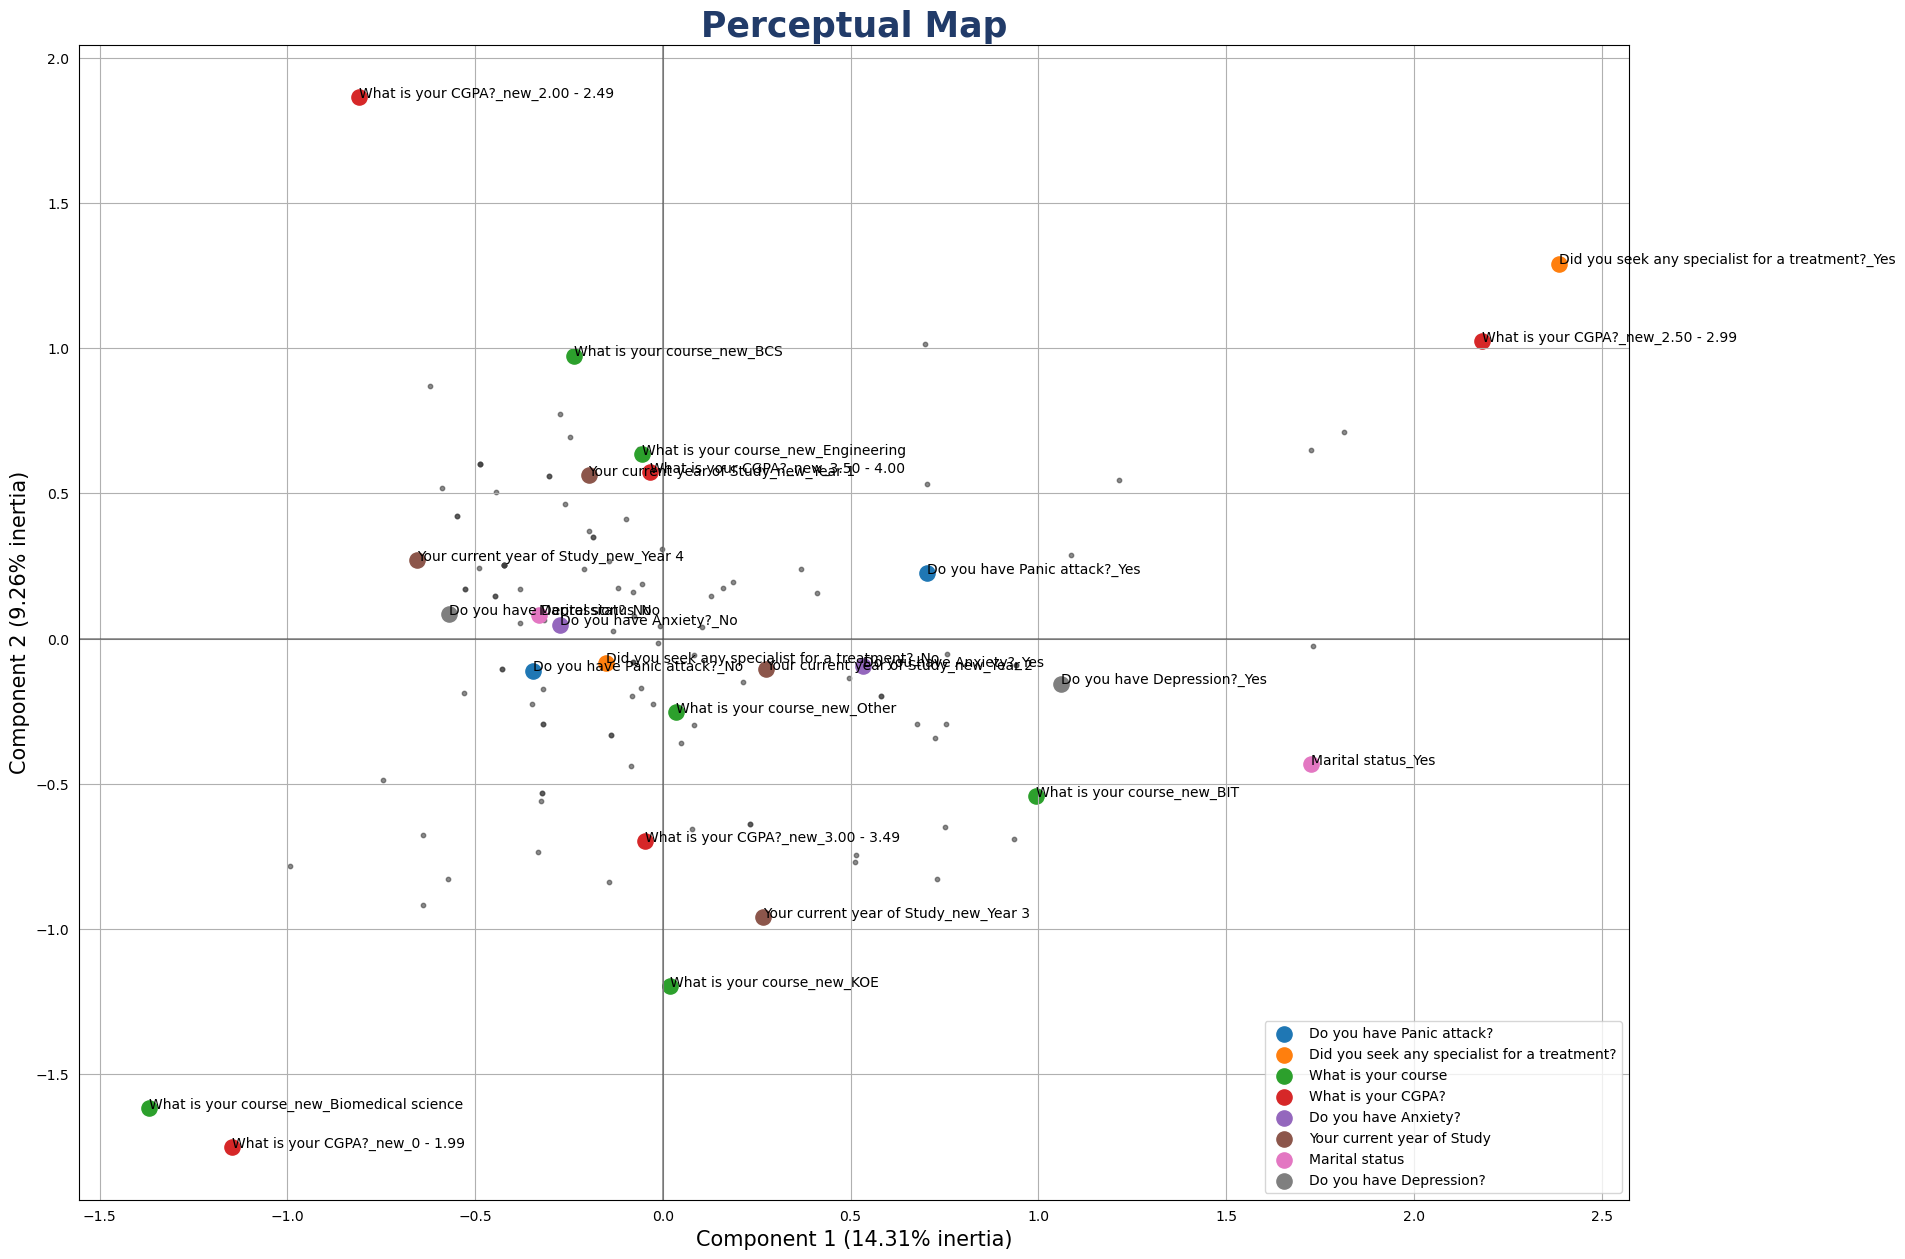

In [28]:
#Plot
ax = data_ACM.plot_coordinates( X=df_ACM,
                                    ax=None,
                                   figsize=(20,15),
                                   show_row_points=True,
                                   show_row_labels=False,
                                   show_column_points=True,
                                   column_points_size=120,
                                   show_column_labels=True,
                                   legend_n_cols=8)
ei = data_ACM.explained_inertia_

ax.set_title("Perceptual Map", fontsize=25, color='#213B69', fontweight=1000, loc='center')
ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(1,100*ei[0]), fontsize=15)
ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(2,100*ei[1]), fontsize=15)
plt.legend(loc="lower right")

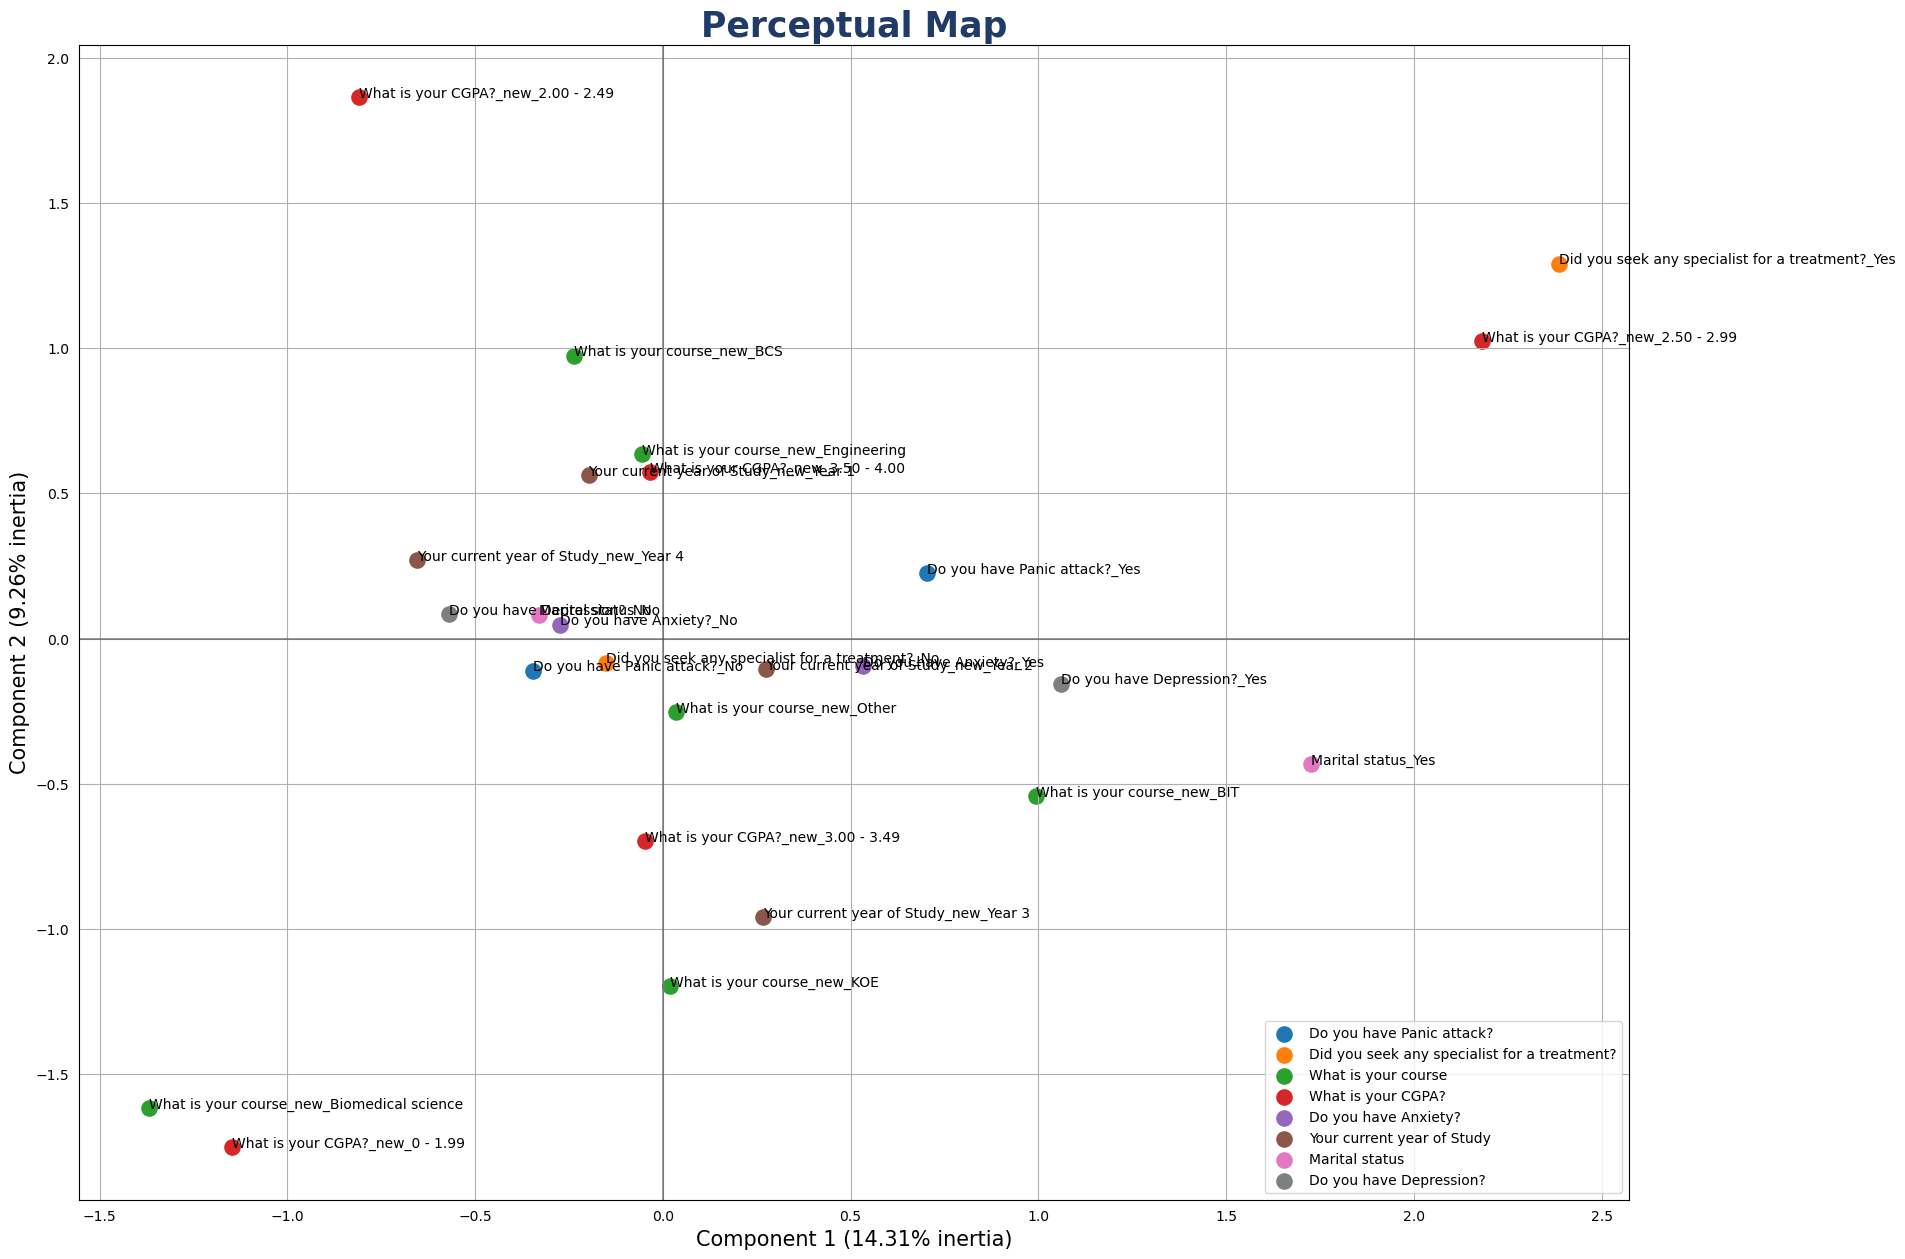

In [29]:
#Plot
ax = data_ACM.plot_coordinates( X=df_ACM,
                                    ax=None,
                                   figsize=(20,15),
                                   show_row_points=False,
                                   show_row_labels=False,
                                   show_column_points=True,
                                   column_points_size=120,
                                   show_column_labels=True,
                                   legend_n_cols=8)
ei = data_ACM.explained_inertia_

ax.set_title("Perceptual Map", fontsize=25, color='#213B69', fontweight=1000, loc='center')
ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(1,100*ei[0]), fontsize=15)
ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(2,100*ei[1]), fontsize=15)
plt.legend(loc="lower right")

In [30]:
df_ACM.nunique()

Do you have Panic attack?                       2
Did you seek any specialist for a treatment?    2
What is your course_new                         6
What is your CGPA?_new                          5
Do you have Anxiety?                            2
Your current year of Study_new                  4
Marital status                                  2
Do you have Depression?                         2
dtype: int64

We noticed that the inertia of the 2 dimensions, which is the contribution of the dimension to explain the variance of the data, is 23.58% (14.31% + 9.27%).

We can also observe that "Do you have Panic attack?" Yes, "Do you have Anxiety?" Yes, and "Marital status" Yes are close to "Do you have Depression?" Yes, while "Do you have Panic attack?" No, "Do you have Anxiety?" No, and "Marital status" No are close to "Do you have Depression?" No.

Now, let's try to plot a perceptual map using the 4 variables ("Do you have Panic attack?", "Do you have Anxiety?", "Marital status", and "Do you have Depression?").

In [31]:
df_ACM2 = df[["Do you have Panic attack?", "Do you have Anxiety?", "Marital status", "Do you have Depression?"]]
df_ACM2

,Do you have Panic attack?,Do you have Anxiety?,Marital status,Do you have Depression?
0,Yes,No,No,Yes
1,No,Yes,No,No
2,Yes,Yes,No,Yes
3,No,No,Yes,Yes
4,No,No,No,No
...,...,...,...,...
96,No,Yes,No,No
97,No,Yes,No,Yes
98,Yes,No,Yes,Yes
99,No,No,No,No


In [32]:
data_ACM2 = prince.MCA(
    n_components = 2,
    n_iter=4,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42)
data_ACM2 = data_ACM2.fit(df_ACM2)

In [33]:
data_ACM2.total_inertia_

1.0

In [34]:
data_ACM2.explained_inertia_

[0.4628097738638067, 0.23950261371237733]

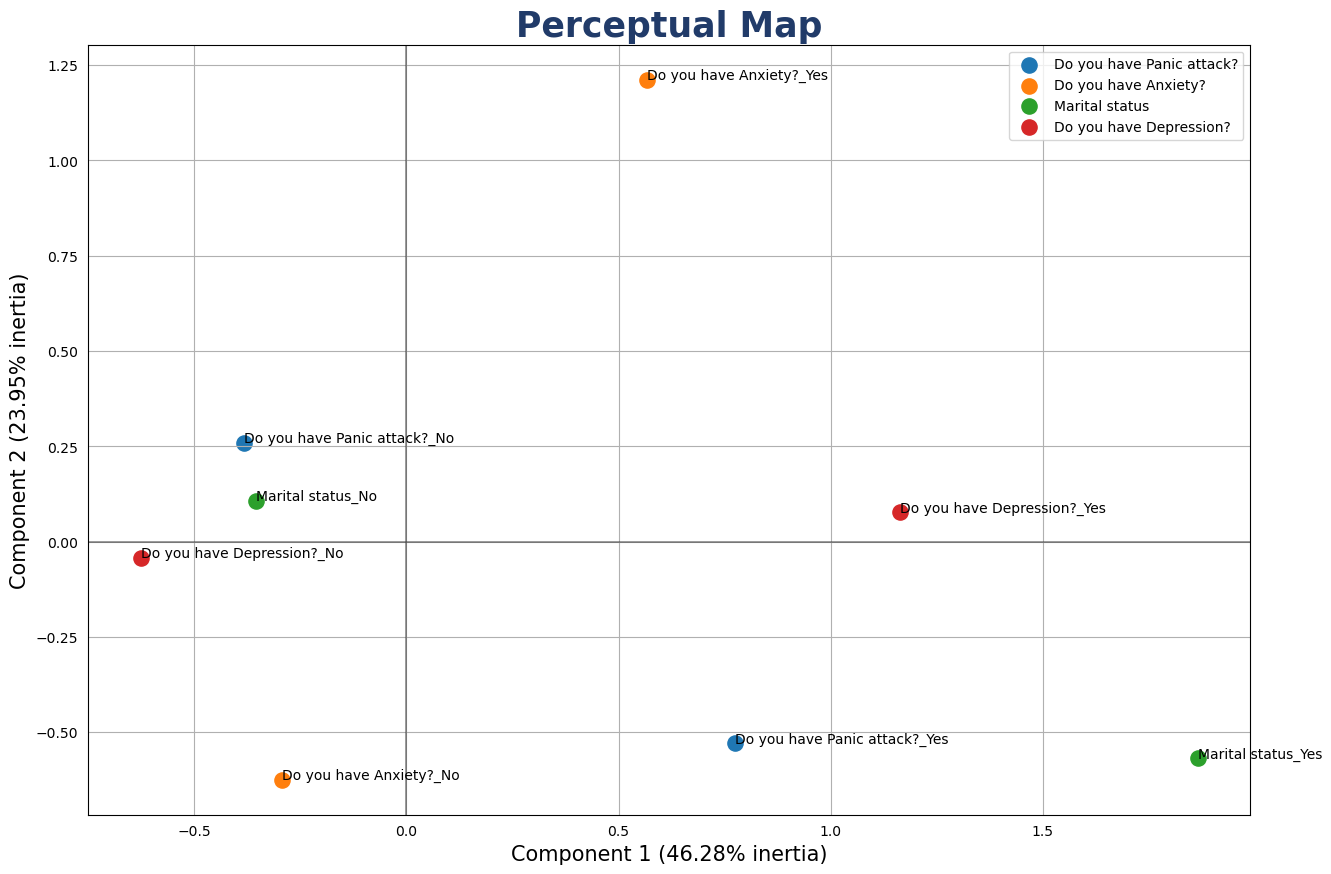

In [35]:
#Plot
ax = data_ACM2.plot_coordinates( X=df_ACM2,
                                    ax=None,
                                   figsize=(15,10),
                                   show_row_points=False,
                                   show_row_labels=False,
                                   show_column_points=True,
                                   column_points_size=120,
                                   show_column_labels=True,
                                   legend_n_cols=8)
ei = data_ACM2.explained_inertia_

ax.set_title("Perceptual Map", fontsize=25, color='#213B69', fontweight=1000, loc='center')
ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(1,100*ei[0]), fontsize=15)
ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(2,100*ei[1]), fontsize=15)
plt.legend(loc="upper right")

Using the variables "Do you have Panic attack?", "Do you have Anxiety?", "Marital status" and "Do you have Depression?", we can see that the inertia of the 2 dimensions is now 70.23% (46.28% + 23.95%). 

We can also observe that the map is showing a split between "Do you have Panic attack?" Yes, "Do you have Anxiety?" Yes, "Marital status" Yes, and "Do you have Depression?" Yes from "Do you have Panic attack?" No, "Do you have Anxiety?" No, "Marital status" No, and "Do you have Depression?" No. However, "Do you have Anxiety?" No and "Do you have Anxiety?" Yes are a little far from the other variables.
